# NEST Cerebellar Model



In [1]:
from src import simulation
from src import analysis
from src import visualization


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Feb 11 21:38:05 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [2]:
results = simulation.example_simulation()

Created 2500 granule cells.
Created 50 Purkinje cells.
Created 100 interneurons.
Created 500 Golgi cells.
Created 50 deep cerebellar nuclei cells.
Created 2500 mossy fibers.
Created 50 climbing fibers.
Network setup complete.
Simulation running...

Feb 11 21:38:07 NodeManager::prepare_nodes [Info]: 
    Preparing 5754 nodes for simulation.

Feb 11 21:38:07 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5754
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

[  46% ] Model time: 455.0 ms, Real-time factor: 1117.00216.9121

[ 100% ] Model time: 1000.0 ms, Real-time factor: 958.8863

Feb 11 21:54:06 SimulationManager::run [Info]: 
    Simulation finished.


In [3]:
pc_spike_data = results["purkinje_spikes"]
dcn_spike_data = results["dcn_spikes"]
analysis_results = analysis.analyze_spike_data(pc_spike_data)
isis = analysis.get_isi_distribution(pc_spike_data["times"])

voltages_data = results["purkinje_voltages"]
voltage_analysis_results = analysis.analyze_voltage_data(voltages_data)

Overall firing rate: 5495.00 Hz
Mean voltage: -72.08 mV
Peak voltage: -52.00 mV


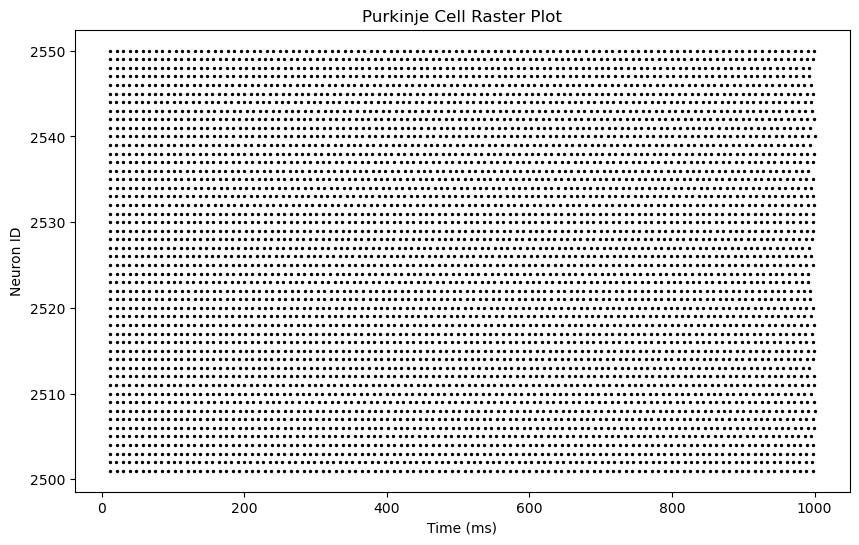

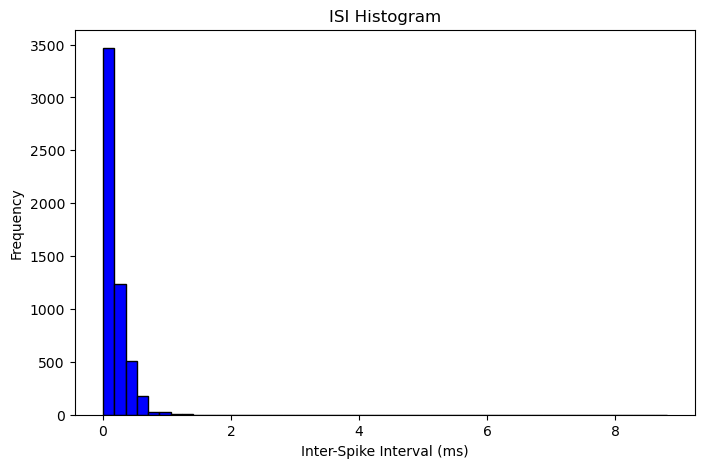

In [4]:
visualization.plot_raster(pc_spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(isis)

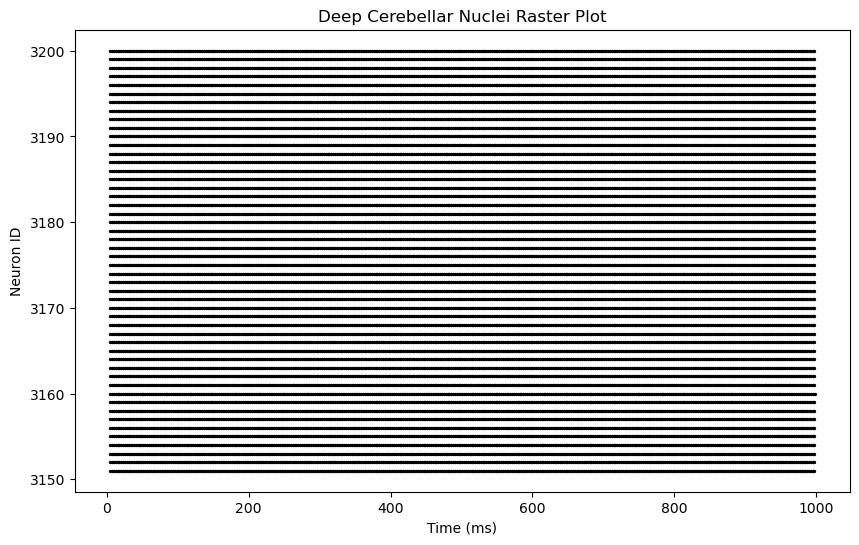

In [5]:
visualization.plot_raster(dcn_spike_data, title="Deep Cerebellar Nuclei Raster Plot")

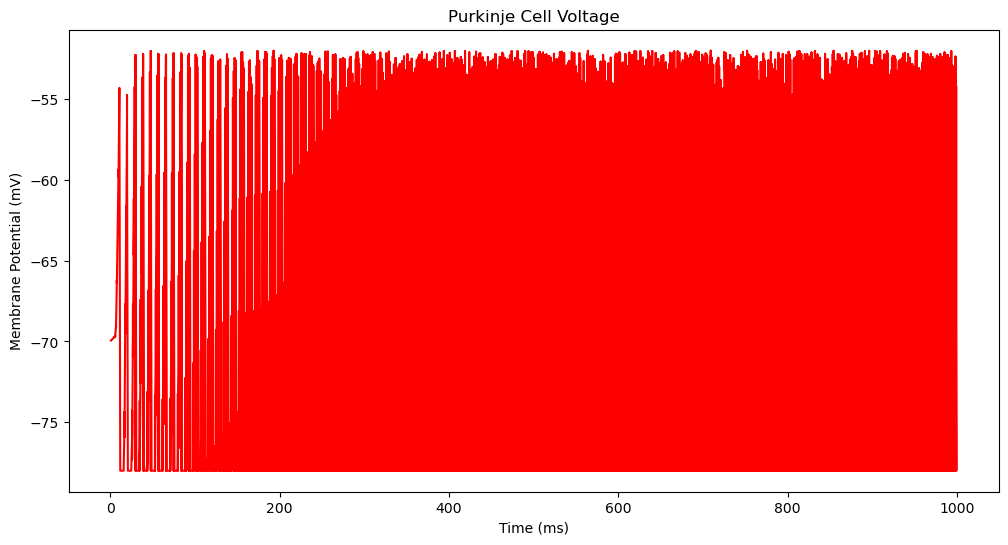

In [6]:
visualization.plot_voltage_trace(voltages_data, title="Purkinje Cell Voltage")


Feb 11 21:59:04 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


(NodeCollection(metadata=spatial, model=poisson_generator, size=2500, first=1, last=2500),
 NodeCollection(metadata=spatial, model=poisson_generator, size=50, first=2501, last=2550),
 NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=2500, first=2551, last=5050),
 NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=500, first=5051, last=5550),
 NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=50, first=5551, last=5600),
 NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=100, first=5601, last=5700),
 NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=50, first=5701, last=5750))

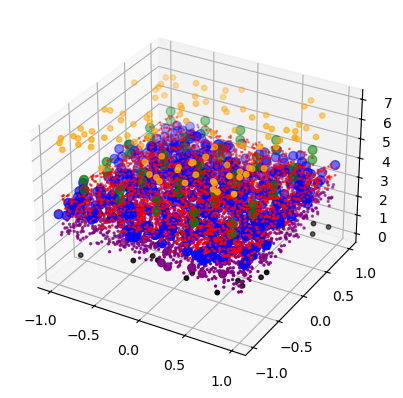

In [7]:
from src.spatial_models import setup_spatial_network

setup_spatial_network()